# 월별 이용비중 그래프  test code
## 00. 기본 설정

In [11]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해 numpy를, 시각화를 위해 seaborn을 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지는 출력되지 않게 합니다.
import warnings
warnings.filterwarnings("ignore")

In [12]:
# 주피터 노트북에서 그래프가 보이는 설정
%matplotlib notebook

In [13]:
# 한글 font 설정

import platform
import matplotlib.font_manager as fm

#matplotlib 패키지 한글 깨짐 처리 시작
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [14]:
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<IPython.core.display.Javascript object>


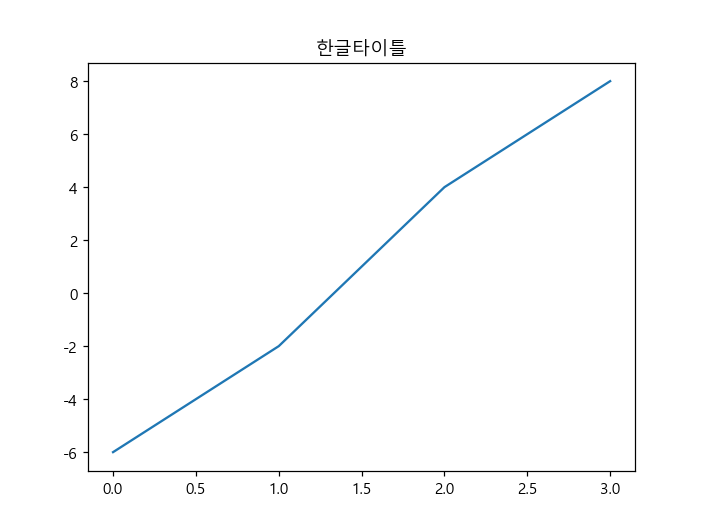

<Axes: title={'center': '한글타이틀'}>

In [15]:
# 한글폰트와 마이너스 폰트 설정 확인

pd.Series([-6, -2, 4, 8]).plot(title="한글타이틀")

In [16]:
plt.close('all')

<hr>

## 01. 데이터 불러오기

In [18]:
df = pd.read_excel('data_prep_dd.xlsx')
df.head(3)

,YM,MCT_NM,OP_YMD,TYPE,MCT_TYPE,latitude,longitude,ADDR,RANK_CNT,RANK_AMT,...,HR_18_22_UE_CNT_RAT,HR_23_4_UE_CNT_RAT,LOCAL_UE_CNT_RAT,RC_M12_MAL_CUS_CNT_RAT,RC_M12_FME_CUS_CNT_RAT,RC_M12_AGE_UND_20_CUS_CNT_RAT,RC_M12_AGE_30_CUS_CNT_RAT,RC_M12_AGE_40_CUS_CNT_RAT,RC_M12_AGE_50_CUS_CNT_RAT,RC_M12_AGE_OVR_60_CUS_CNT_RAT
0,202301,희야네식당,20000916,T1,가정식,33.279498,126.719772,제주 서귀포시 남원읍 남원리 100-3번지,3,4,...,0.000000,0.0,0.381616,0.644,0.356,0.183,0.232,0.351,0.171,0.063
1,202301,희신이네,20060515,T1,가정식,33.263389,126.550838,제주 서귀포시 서홍동 1651-11번지,3,4,...,0.264706,0.0,0.701183,0.686,0.314,0.118,0.261,0.342,0.190,0.089
2,202301,흥미,20030814,T1,가정식,33.490006,126.495004,제주 제주시 연동 291-40번지,4,4,...,0.094340,0.0,0.736842,0.562,0.438,0.107,0.299,0.336,0.226,0.032


In [19]:
# 컬럼명 확인
df.columns

Index(['YM', 'MCT_NM', 'OP_YMD', 'TYPE', 'MCT_TYPE', 'latitude', 'longitude',
       'ADDR', 'RANK_CNT', 'RANK_AMT', 'RANK_MEAN', 'MON_UE_CNT_RAT',
       'TUE_UE_CNT_RAT', 'WED_UE_CNT_RAT', 'THU_UE_CNT_RAT', 'FRI_UE_CNT_RAT',
       'SAT_UE_CNT_RAT', 'SUN_UE_CNT_RAT', 'HR_5_11_UE_CNT_RAT',
       'HR_12_13_UE_CNT_RAT', 'HR_14_17_UE_CNT_RAT', 'HR_18_22_UE_CNT_RAT',
       'HR_23_4_UE_CNT_RAT', 'LOCAL_UE_CNT_RAT', 'RC_M12_MAL_CUS_CNT_RAT',
       'RC_M12_FME_CUS_CNT_RAT', 'RC_M12_AGE_UND_20_CUS_CNT_RAT',
       'RC_M12_AGE_30_CUS_CNT_RAT', 'RC_M12_AGE_40_CUS_CNT_RAT',
       'RC_M12_AGE_50_CUS_CNT_RAT', 'RC_M12_AGE_OVR_60_CUS_CNT_RAT'],
      dtype='object')

In [20]:
df.shape

(67857, 31)

<hr>

## 02. 칼럼 정리

In [38]:
# 필요한 칼럼만 추출
col_names = ['YM', 'MCT_NM', 'MCT_TYPE', 'RANK_CNT']

In [39]:
df_rank = df[col_names]
df_rank.head(3)

,YM,MCT_NM,MCT_TYPE,RANK_CNT
0,202301,희야네식당,가정식,3
1,202301,희신이네,가정식,3
2,202301,흥미,가정식,4


In [40]:
df_rank['RANK_CNT'].value_counts()

RANK_CNT
3    16869
4    16730
5    10277
2    10137
6     7074
1     6770
Name: count, dtype: int64

<hr>

## 03. 월/타입별 RANK_CNT 평균 계산

In [47]:
# 'YM'과 'MCT_TYPE'별 평균 RANK_CNT 계산 (1은 상위 매출, 6은 하위 매출)
df_grouped = df.groupby(['YM', 'MCT_TYPE'])['RANK_CNT'].mean().reset_index()
df_grouped.head()

,YM,MCT_TYPE,RANK_CNT
0,202301,가정식,4.037270
1,202301,구내식당/푸드코트,2.500000
2,202301,기사식당,4.000000
3,202301,기타세계요리,3.500000
4,202301,꼬치구이,3.844444


In [48]:
df_grouped.shape  # (356, 3)

(356, 3)

<hr>

## 03. YM >> M 변경

In [49]:
# YM에서 월만 추출하여 저장
df_grouped['MONTH'] = df_grouped['YM'].astype(str).str[-2:]
df_grouped.head(3)

,YM,MCT_TYPE,RANK_CNT,MONTH
0,202301,가정식,4.03727,01
1,202301,구내식당/푸드코트,2.50000,01
2,202301,기사식당,4.00000,01


In [50]:
# YM 칼럼 삭제
df_month = df_grouped.drop(columns='YM')
df_month.head(3)

,MCT_TYPE,RANK_CNT,MONTH
0,가정식,4.03727,01
1,구내식당/푸드코트,2.50000,01
2,기사식당,4.00000,01


<hr>

## 04. 데이터프레임 저장

In [52]:
df_month.to_csv('rank_by_month_type.csv', encoding='cp949', index=False)